# Context on CTG Model parameters


In [ ]:
# The desired time gap (τ) is the amount of time time that a driver of a following vehicle aims to maintain between 
# their vehicle and the vehicle directly in front of them (lead vehicle). It is a safety margin under which the driver
# has enough time to react to the movements of the lead vehicle. The smaller the gap, the less time the following driver
# has to react to the lead vehicle and vice versa.

In [2]:
# α must have a positive sign becuase α represents the acceleration gain, which is how aggressively the ego vehicle adjusts its speed
# in response to the time gap. It must be positive so that the ego vehicle adjusts its speed in the correct direction. If it was negative,
# then the ego vehicle would decelerate when the space gap increases and accelerate when the space gap decreaeses which is the opposite
# behavior of what is intended. This is because a negative acceleration gain would reflect an inverse relationship between it and 
# the space gap, which is the opposite of what we intend with the car correclty adjusting its speed in response to the lead. 

# Set up the simulation 


In [3]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def calculate_acceleration(ego_speed, space_gap, alpha, tau):
    """
    Calculate the acceleration for the ego vehicle based on the constant time-gap car-following model.

    Parameters:
    - ego_speed: Speed of the ego vehicle (meters per second, m/s).
    - space_gap: Space gap between the ego vehicle and the lead vehicle (meters, m).
    - alpha: Acceleration gain parameter (per second squared, 1/s^2).
    - tau: Desired time gap to maintain with the lead vehicle (seconds, s).

    Returns:
    - Acceleration for the ego vehicle (meters per second squared, m/s^2).
    """
    # Calculate the desired space gap based on the current speed and desired time gap
    desired_gap = ego_speed * tau
    
    # Calculate the acceleration needed to adjust the gap to the desired gap
    acceleration = alpha * (space_gap - desired_gap)
    
    return acceleration

In [5]:
def simulate_car_following(time_steps, alpha, tau, initial_ego_speed, initial_space_gap, lead_speeds):
    """
    Simulate the car-following behavior using Euler's method for numerical integration.

    Parameters:
    - time_steps: Array of time steps for the simulation (seconds, s).
    - alpha: Acceleration gain parameter (per second squared, 1/s^2).
    - tau: Desired time gap to maintain with the lead vehicle (seconds, s).
    - initial_ego_speed: Initial speed of the ego vehicle (meters per second, m/s).
    - initial_space_gap: Initial space gap between the ego vehicle and the lead vehicle (meters, m).
    - lead_speeds: Speed profile of the lead vehicle over time (meters per second, m/s).

    Returns:
    - time_steps: Array of time steps for the simulation (seconds, s).
    - space_gaps: Space gaps between the ego vehicle and the lead vehicle over time (meters, m).
    - ego_speeds: Speeds of the ego vehicle over time (meters per second, m/s).
    - lead_speeds: Speed profile of the lead vehicle over time (meters per second, m/s).
    """
    dt = time_steps[1] - time_steps[0]  # Time step size based on provided time steps
    
    # Initialize lists to store results
    space_gaps = [initial_space_gap]
    ego_speeds = [initial_ego_speed]
    
    # Run the simulation using Euler's method
    for step in range(1, len(time_steps)):
        # Get the last calculated states
        current_space_gap = space_gaps[-1]
        current_ego_speed = ego_speeds[-1]
        current_lead_speed = lead_speeds[step - 1]
        
        # Calculate relative speed between lead and ego vehicle
        current_relative_speed = current_lead_speed - current_ego_speed
        
        # Calculate acceleration of ego vehicle
        acceleration = calculate_acceleration(current_ego_speed, current_space_gap, alpha, tau)
        
        # Update ego vehicle speed and space gap using Euler's method
        new_ego_speed = current_ego_speed + dt * acceleration
        new_space_gap = current_space_gap + dt * current_relative_speed
        

        # Store results
        ego_speeds.append(new_ego_speed)
        space_gaps.append(new_space_gap)
    
    return time_steps, space_gaps, ego_speeds, lead_speeds

# Run the simulation


In [6]:
# Define simulation parameters
alpha = 1.5  # Acceleration gain (1/s^2)
tau = 0.5  # Desired time gap (s)
initial_ego_speed = 20.0  # Initial ego vehicle speed (m/s)
initial_space_gap = 10.0  # Initial space gap (m)
dt = 0.1  # Time step (s)
total_time = 100.0  # Total simulation time (s)
time_steps = np.arange(0, total_time, dt)  # Time steps for simulation
lead_speeds = np.sin(time_steps) + 20.0  # Lead vehicle speed profile (m/s)

# Run simulation
time_steps, space_gaps, ego_speeds, lead_speeds = simulate_car_following(
    time_steps, alpha, tau, initial_ego_speed, initial_space_gap, lead_speeds
)



# Ego and Lead Vehicle Speeds (Figure 1)


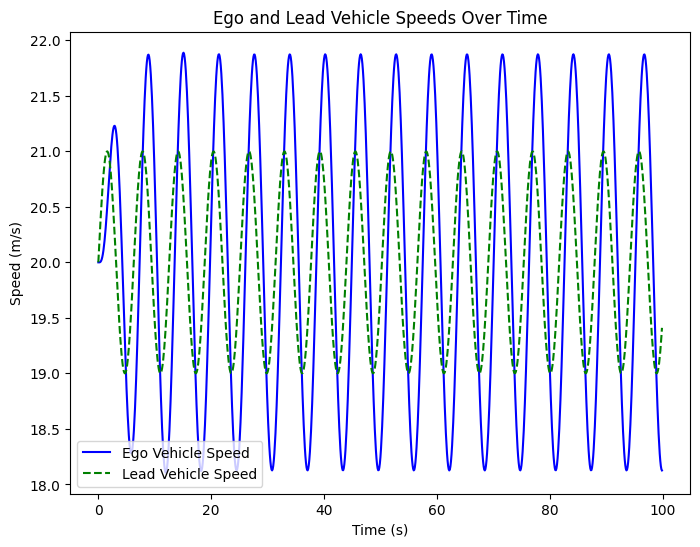

In [7]:
# Plot results
### Enter your plotting code here
plt.figure(figsize=(8, 6))

# Plot Ego Vehicle Speed and Lead Vehicle Speed
plt.plot(time_steps, ego_speeds, label='Ego Vehicle Speed', color='blue')
plt.plot(time_steps, lead_speeds, label='Lead Vehicle Speed', linestyle='--', color='green')

# Add title, labels, and legend
plt.title('Ego and Lead Vehicle Speeds Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Speed (m/s)')  
plt.legend()  

plt.show()



# Space Gap Plot (Figure 2)

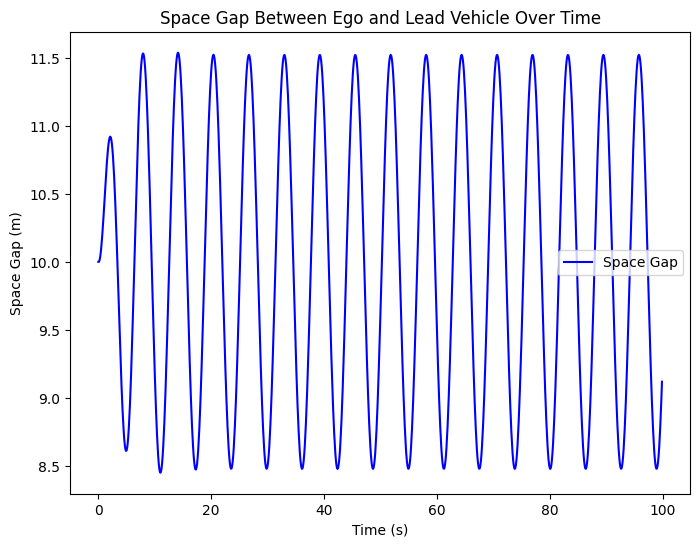

In [8]:
plt.figure(figsize=(8, 6))

# Plot the space gap
plt.plot(time_steps, space_gaps, label='Space Gap', color='blue')

# Add title, labels, and legend
plt.title('Space Gap Between Ego and Lead Vehicle Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Space Gap (m)')  
plt.legend() 


plt.show()


# Relative Speed Plot (Figure 3)

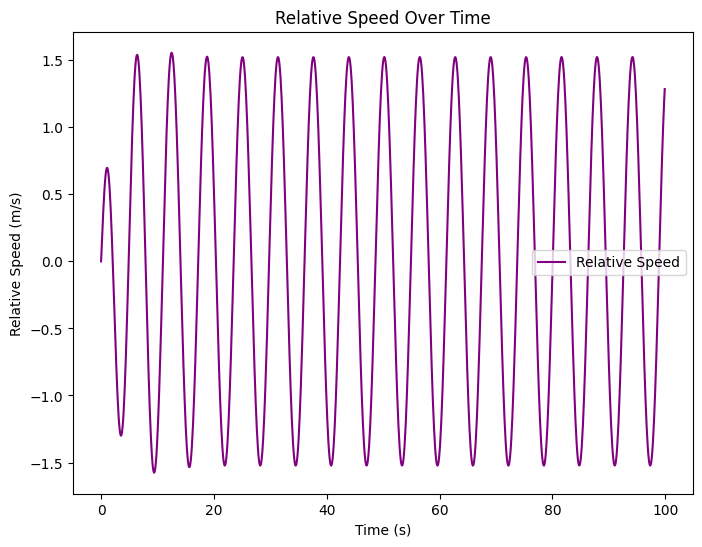

In [9]:
# Calculate relative speed
relative_speeds = np.array(lead_speeds) - np.array(ego_speeds)

plt.figure(figsize=(8, 6))

# Plot the calculated relative speed
plt.plot(time_steps, relative_speeds, label='Relative Speed', color='purple')

# Add title, labels, and legend
plt.title('Relative Speed Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Relative Speed (m/s)') 
plt.legend() 

plt.show()


# Analysis of Results 

In [10]:
# Based on the results, the lead vehicle's speed follows a wave-like pattern as it oscillates between 
# accelerating and decelerateing periodically. 
# Its speed constantly fluctuates up and down every ~5 seconds as seen in Figure 1.

# The ego vehicle maintains the desired time gap with the lead vehicle by increasing its speed in response to the
# lead vehicle increasing its speed, and decreases its speed in response to the lead vehicle decreasing its speed. 
# Due to the time gap and acceleration gain parameter (α), there is a delay in which the ego vehicle speeds or slows down
# in response to the lead vehicle and it does not immediately match the lead vehicle's speed. As such, the two curves from
# Figure 1 are not perfectly on top of each other.

# Figure 2 shows the distance/space between the ego and lead vehicle, while Figure 3 shows the difference between the lead 
# vehicle's speed and the ego vehicle's speed (relative speed). The relative speed plot mirrors the space gap plot
# because when relative speed is positive (lead vehicle speeds up faster than ego), the corresponding space gap increases and 
# when the relative speed is negative, the space gap decreases. Thus, the space gap increases when relative speed increases 
# and decreases when relative speed decreases, indicating a direct relationship between the two.

# It looks like the following/ego vehicle is dissipating the oscillations. This is because the following vehicle adjusts its
#  speed based on the space gap and the desired time gap. Over time, these adjustments smooth out the large differences 
# between the vehicles’ speeds. It appears that the lead vehicle oscillates more strongly while the following vehicle's 
# oscillations are less strong/pronounced, showing that it is dissipating and not amplifying the oscillations.

# Exploring new parameters (α = 1.5, τ = 2.5)

### Updated simulation

In [11]:
# Define simulation parameters
alpha = 1.5  # Acceleration gain (1/s^2)
tau = 2.5  # Desired time gap (s)
initial_ego_speed = 20.0  # Initial ego vehicle speed (m/s)
initial_space_gap = 10.0  # Initial space gap (m)
dt = 0.1  # Time step (s)
total_time = 100.0  # Total simulation time (s)
time_steps = np.arange(0, total_time, dt)  # Time steps for simulation
lead_speeds = np.sin(time_steps) + 20.0  # Lead vehicle speed profile (m/s)

# Run simulation
time_steps, space_gaps, ego_speeds, lead_speeds = simulate_car_following(
    time_steps, alpha, tau, initial_ego_speed, initial_space_gap, lead_speeds
)

### Ego and Lead Vehicle Speeds Plot (Figure 4)

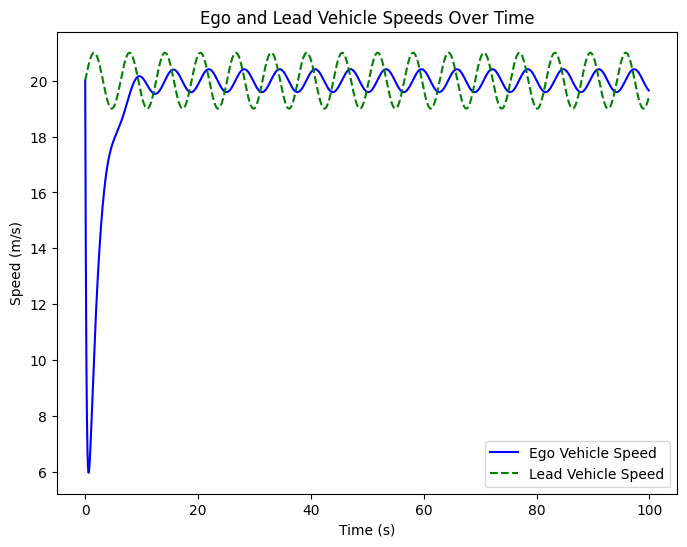

In [12]:
plt.figure(figsize=(8, 6))

# Plot Ego Vehicle Speed and Lead Vehicle Speed
plt.plot(time_steps, ego_speeds, label='Ego Vehicle Speed', color='blue')
plt.plot(time_steps, lead_speeds, label='Lead Vehicle Speed', linestyle='--', color='green')

# Add title, labels, and legend
plt.title('Ego and Lead Vehicle Speeds Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Speed (m/s)')  
plt.legend()  

plt.show()

### Space Gap Plot (Figure 5)

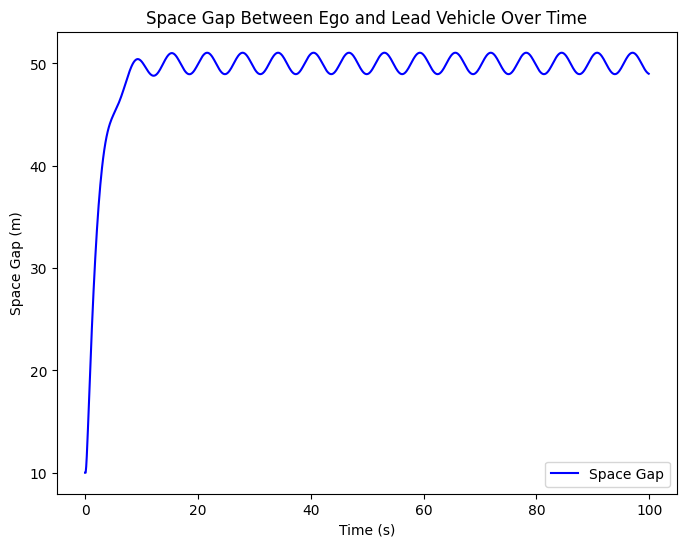

In [13]:
plt.figure(figsize=(8, 6))

# Plot the space gap
plt.plot(time_steps, space_gaps, label='Space Gap', color='blue')

# Add title, labels, and legend
plt.title('Space Gap Between Ego and Lead Vehicle Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Space Gap (m)')  
plt.legend() 


plt.show()

### Relative Speed Plot (Figure 6)

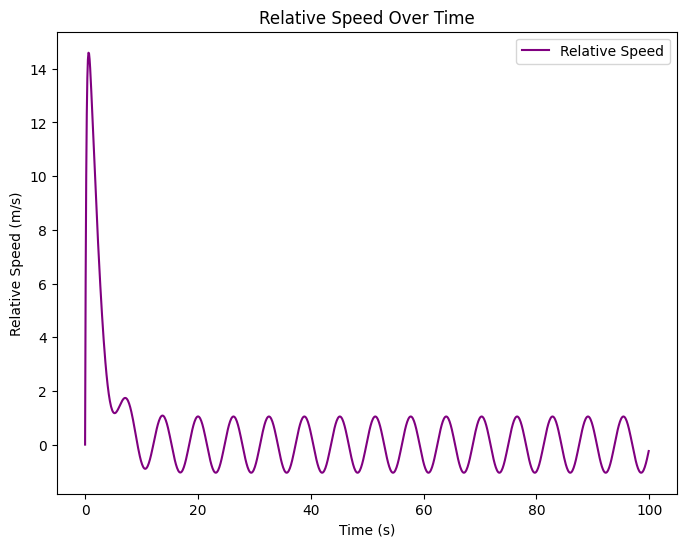

In [14]:
# Calculate relative speed
relative_speeds = np.array(lead_speeds) - np.array(ego_speeds)

plt.figure(figsize=(8, 6))

# Plot the calculated relative speed
plt.plot(time_steps, relative_speeds, label='Relative Speed', color='purple')

# Add title, labels, and legend
plt.title('Relative Speed Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Relative Speed (m/s)') 
plt.legend() 

plt.show()

# Question 4.8

In [15]:
# With the updated time gap of 2.5, there are some quite unusual patterns with the resulting plots.  Both vehicles' speeds
# and the relative speed tends to fluctuate around the same values as before, but the resulting space gap is much larger. This makes
# sense since with a larger time gap, there must be much more space between the two cars to maintain it. 
# 
# One unusual pattern is that with all of these plots, there is a large spike initially. Due to the larger time gap, 
# the ego vehicle must wait much longer to respond to the initial conditions. The lead vehicle has a longer "head start" on 
# the ego vehicle as it must get to around ~50m before the following vehicle can start accelerating to maintain that distance. 
# Once the distance is maintained, the speeds fluctuate at similar rates as before. Another interesting pattern is with the speeds
# of the two vehicles. The lead vehicle fluctuates its speed around 20mph; the following vehicle starts at this speed but drops 
# dramatically to nearly 0, and then increases dramatically back up to around 20mph as shown with the spike in figures 4 and 6.
#  This dramatic increase and decrease in speed of the ego vehicle reflects its "waiitng" time for the lead vehicle to get 
# far enough away in order to maintain the larger time gap of 2.5 seconds.

# Question 4.9

In [16]:
# Under these parameters, the ego vehicle initially slows down dramatically and almost comes to a stop, and then speeds up 
# dramatically to match the lead vehicle speed. This is likely done to create enough space for the desired time gap initially, and then
# the ego vehicle can maintain a consistent fluctuation in speed and distance after the desired space gap is stabilized. Additionally, 
# with the larger time gap the ego vehicle reacts slower to the lead vehicle's changes compared to before causing the ego's speeds
# to lag behind even more as seen in the first plot. The initial spike in the ego vehicle' speed decreasing and then increasing 
# significantly aligns with my expectations because with a larger time gap, the ego vehicle must initially wait longer to speed up so
# that the appropriate distance is maintained. Additionally with a larger time gap, there is more room for error/room to react to the 
# lead vehicle's speed which makes sense that the ego vehicle's speed lags behind even more. 

# Question 4.10

### Updated simulation

In [17]:
# Define simulation parameters
alpha = 0.1  # Acceleration gain (1/s^2)
tau = 0.5 # Desired time gap (s)
initial_ego_speed = 20.0  # Initial ego vehicle speed (m/s)
initial_space_gap = 10.0  # Initial space gap (m)
dt = 0.1  # Time step (s)
total_time = 100.0  # Total simulation time (s)
time_steps = np.arange(0, total_time, dt)  # Time steps for simulation
lead_speeds = np.sin(time_steps) + 20.0  # Lead vehicle speed profile (m/s)

# Run simulation
time_steps, space_gaps, ego_speeds, lead_speeds = simulate_car_following(
    time_steps, alpha, tau, initial_ego_speed, initial_space_gap, lead_speeds
)

### Ego and Lead Vehicle Speeds Plot (Figure 7)

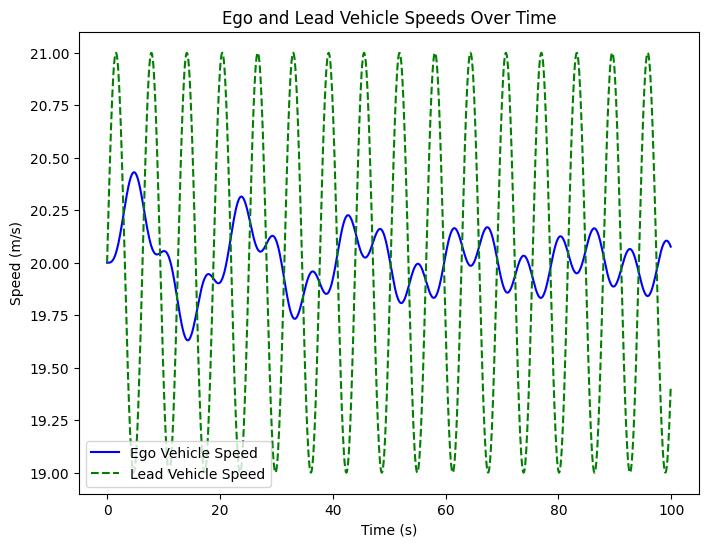

In [18]:
plt.figure(figsize=(8, 6))

# Plot Ego Vehicle Speed and Lead Vehicle Speed
plt.plot(time_steps, ego_speeds, label='Ego Vehicle Speed', color='blue')
plt.plot(time_steps, lead_speeds, label='Lead Vehicle Speed', linestyle='--', color='green')

# Add title, labels, and legend
plt.title('Ego and Lead Vehicle Speeds Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Speed (m/s)')  
plt.legend()  

plt.show()

### Space Gap Plot (Figure 8)

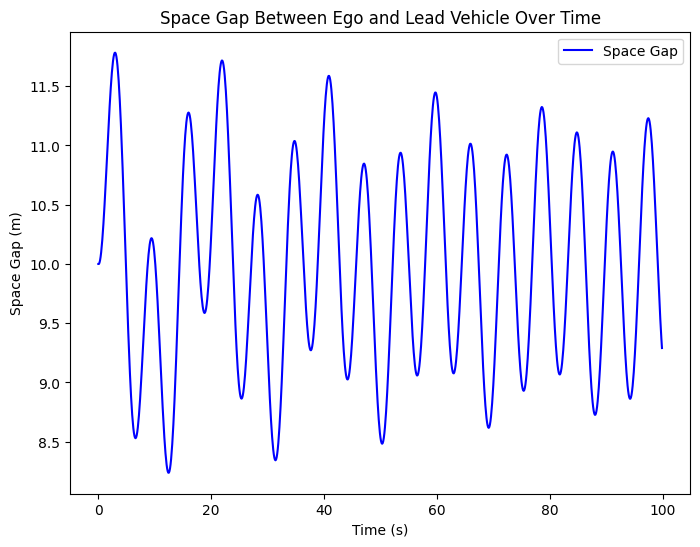

In [19]:
plt.figure(figsize=(8, 6))

# Plot the space gap
plt.plot(time_steps, space_gaps, label='Space Gap', color='blue')

# Add title, labels, and legend
plt.title('Space Gap Between Ego and Lead Vehicle Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Space Gap (m)')  
plt.legend() 


plt.show()

### Relative Speed Plot (Figure 9)

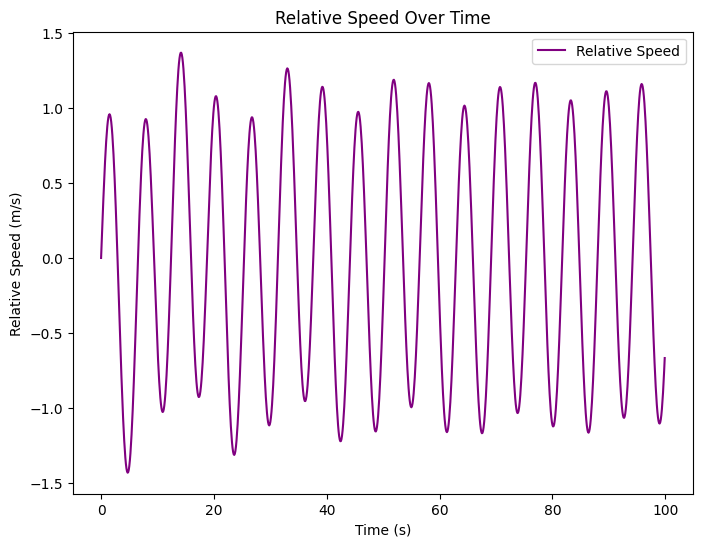

In [20]:
# Calculate relative speed
relative_speeds = np.array(lead_speeds) - np.array(ego_speeds)

plt.figure(figsize=(8, 6))

# Plot the calculated relative speed
plt.plot(time_steps, relative_speeds, label='Relative Speed', color='purple')

# Add title, labels, and legend
plt.title('Relative Speed Over Time')
plt.xlabel('Time (s)')  
plt.ylabel('Relative Speed (m/s)') 
plt.legend() 

plt.show()

### Analysis

In [21]:
# Due to the lower acceleration gain (0.1), the ego vehicle's speed is less responsive to the lead vehicle. The ego vehicle
# adjusts its speed much more slowly resulting in smoother and gradual changes in its speed as seen in Figure 7.
# With the small time gap of 0.5, the space gap and the speeds themselves fluctuate around similar values as the first plot 
# with the same time gap (from question 3). However, the oscillations themselves are much smaller and not consistent in their 
# amplitude or frequency. This reflects the much slower response of the ego vehicle to the lead vehicle and causes the space gap 
# and relative speed to be less consistent than before. Also specifically with Figure 7 plotting both speeds of the 
# ego and lead vehicles, the ego vehicle's speed oscillates much less than the lead vehicle as it is only able to accelerate or
# decelerate a smaller amount with a smaller acceleration gain value meaning the ego's oscillations dissipate rather than amplify.
# This all makes sense because with a much smaller acceleration gain, the ego vehicle is not able to speed up or slow down as quickly 
# as before, and thus its changes in speed are much slower and the resulting space gap changes in an inconsistent way. 

# Multi-car simulations

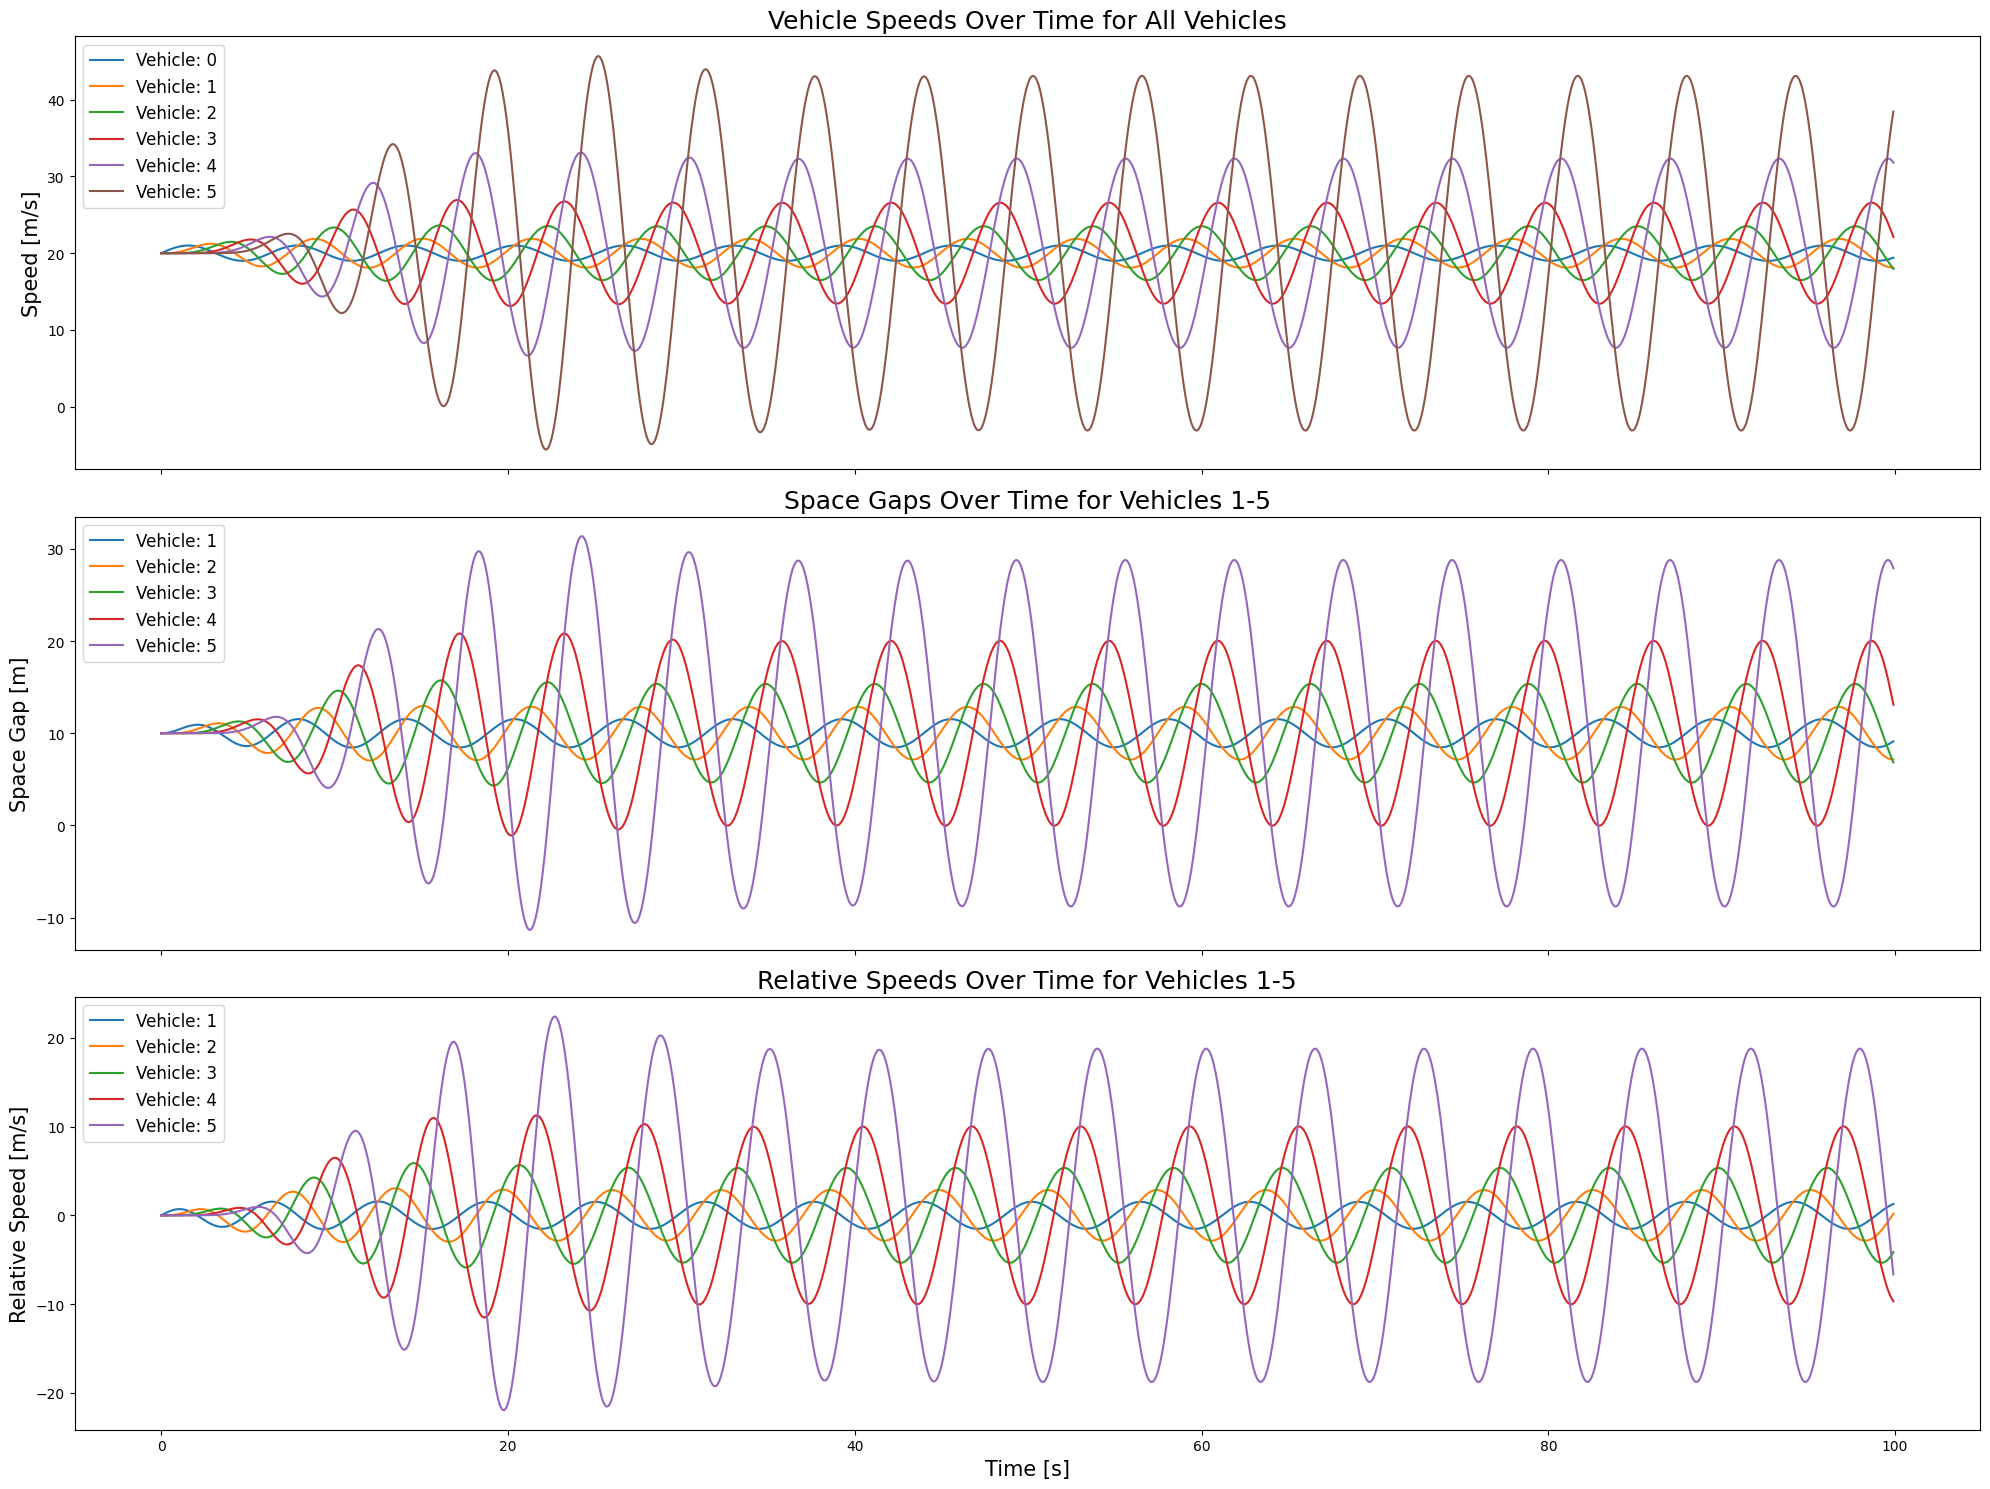

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store results for all vehicles
all_speeds = []  # List to store speeds for all vehicles (0-5)
all_space_gaps = []  # List to store space gaps for vehicles 1-5
all_relative_speeds = []  # List to store relative speeds for vehicles 1-5

# Define simulation parameters
alpha = 1.5 # Acceleration gain (1/s^2)
tau = 0.5  # Desired time gap (s)
initial_ego_speed = 20.0  # Initial ego vehicle speed (m/s)
initial_space_gap = 10.0  # Initial space gap (m)
dt = 0.1  # Time step (s)
total_time = 100.0  # Total simulation time (s)
time_steps = np.arange(0, total_time, dt)  # Time steps for simulation
lead_speeds_initial = np.sin(time_steps) + 20.0  # Lead vehicle speed profile (m/s)

# Simulate the lead vehicle (Vehicle 0)
lead_speeds = lead_speeds_initial  # Lead vehicle speed is predefined
all_speeds.append(lead_speeds)  # Append lead vehicle speeds as Vehicle 0

# Simulate the following vehicles (Vehicles 1-5)
num_following_vehicles = 5
current_lead_speeds = lead_speeds  # Start with the lead vehicle speeds

for i in range(1, num_following_vehicles + 1):  # Start loop from 1 to 5
    # Simulate the following vehicle with updated lead speeds
    time_steps, space_gaps, ego_speeds, _ = simulate_car_following(
        time_steps, alpha, tau, initial_ego_speed, initial_space_gap, current_lead_speeds
    )
    
    # Append results for each following vehicle
    all_speeds.append(ego_speeds)
    all_space_gaps.append(space_gaps)
    all_relative_speeds.append(np.array(current_lead_speeds) - np.array(ego_speeds))  # Correct calculation of relative speed
    
    # Update lead speeds for the next follower
    current_lead_speeds = ego_speeds

# Create a multi-panel plot to visualize the results for all vehicles
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

# Plot Speeds for All Vehicles (0-5)
for i, speeds in enumerate(all_speeds):
    axes[0].plot(time_steps, speeds, label='Vehicle: ' + str(i))
axes[0].set_ylabel('Speed [m/s]', fontsize=15)
axes[0].set_title('Vehicle Speeds Over Time for All Vehicles', fontsize=18)
axes[0].legend(fontsize=12)

# Plot Space Gaps for Vehicles 1-5
for i, space_gaps in enumerate(all_space_gaps, start=1):  # Start index at 1 for vehicles 1 to 5
    axes[1].plot(time_steps, space_gaps, label='Vehicle: ' + str(i))
axes[1].set_ylabel('Space Gap [m]', fontsize=15)
axes[1].set_title('Space Gaps Over Time for Vehicles 1-5', fontsize=18)
axes[1].legend(fontsize=12)

# Plot Relative Speeds for Vehicles 1-5
for i, relative_speeds in enumerate(all_relative_speeds, start=1):  # Start index at 1 for vehicles 1 to 5
    axes[2].plot(time_steps, relative_speeds, label='Vehicle: ' + str(i))
axes[2].set_ylabel('Relative Speed [m/s]', fontsize=15)
axes[2].set_xlabel('Time [s]', fontsize=15)
axes[2].set_title('Relative Speeds Over Time for Vehicles 1-5', fontsize=18)
axes[2].legend(fontsize=12)

plt.tight_layout()
plt.show()